![](https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/LinePurplePink.jpg?raw=true)

# Import Libraries
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/upload-icon.png?raw=true" width="100"/>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set()
from scipy import stats

from sklearn. impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.metrics as metrics

style.use('fivethirtyeight')
pd.options.mode.chained_assignment = None  # default='warn'

In [13]:
# we are using excel file that's why I import openpyxl

!pip install openpyxl

# Loading Dataset
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/add-to-database.png?raw=true" width="100"/>

In [14]:
data = pd.read_excel('../input/tashkent-real-estate-2019/uybor.xlsx')

# EDA + FE: Exploratory Data Analysis and Feature Engineering
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/data%20analysis.png?raw=true" width="100"/>

In [15]:
data.head()

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Chilonzor район, площадь Актепа",Chilonzor,3,70.0,3,5,55000,41.300156,69.210831


In [16]:
data.shape

(7421, 9)

In [17]:
data.nunique()

address       1556
district        12
rooms            9
size           385
level           18
max_levels      22
price          695
lat            727
lng            693
dtype: int64

### We can see that this dataset doesn't have NaN values

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     7421 non-null   object 
 1   district    7421 non-null   object 
 2   rooms       7421 non-null   int64  
 3   size        7421 non-null   float64
 4   level       7421 non-null   int64  
 5   max_levels  7421 non-null   int64  
 6   price       7421 non-null   int64  
 7   lat         7421 non-null   float64
 8   lng         7421 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 521.9+ KB


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,7421.0,2.619728,1.076887,1.000000,2.000000,3.000000,3.000000,10.000000
size,7421.0,73.150726,36.999670,14.000000,50.000000,65.000000,85.000000,456.000000
level,7421.0,3.699367,2.239028,1.000000,2.000000,3.000000,5.000000,19.000000
max_levels,7421.0,6.031397,2.607673,1.000000,4.000000,5.000000,9.000000,25.000000
price,7421.0,59117.618919,46701.090308,10500.000000,35000.000000,46500.000000,66847.000000,800000.000000
lat,7421.0,41.303620,0.033771,41.186375,41.281265,41.296388,41.324956,41.424522
lng,7421.0,69.256615,0.059061,69.148915,69.205802,69.260189,69.293713,69.588687


### Price
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/price.png?raw=true" width="100"/>

#### Price-Column has got outliers

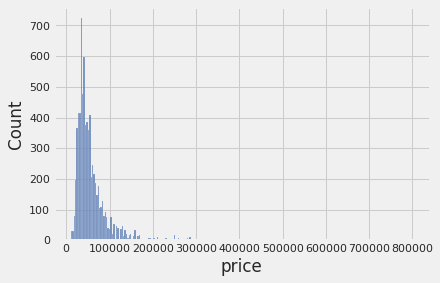

In [20]:
sns.histplot(data.price)
plt.show()

#### Let's delete it !

In [21]:
data['price'] = np.log(data['price'])

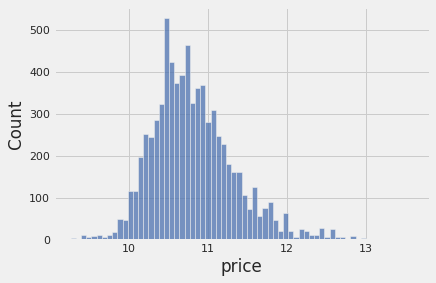

In [22]:
sns.histplot(data.price)
plt.show()

In [23]:
q = data['price'].quantile(0.99)
df = data[data['price']<q]
df.describe(include='all')

,address,district,rooms,size,level,max_levels,price,lat,lng
count,7345,7345,7345.000000,7345.000000,7345.000000,7345.000000,7345.000000,7345.000000,7345.000000
unique,1539,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"город Ташкент, Chilonzor район, Чиланзар",Chilonzor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,112,1627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.600000,71.699733,3.697890,6.014159,10.796618,41.303570,69.256409
std,NaN,NaN,1.051299,33.198019,2.238765,2.604267,0.502503,0.033890,0.059261
min,NaN,NaN,1.000000,14.000000,1.000000,1.000000,9.259131,41.186375,69.148915
25%,NaN,NaN,2.000000,50.000000,2.000000,4.000000,10.463103,41.281265,69.205802
50%,NaN,NaN,2.000000,65.000000,3.000000,5.000000,10.736397,41.296252,69.260121
75%,NaN,NaN,3.000000,84.000000,5.000000,9.000000,11.082143,41.325530,69.293713


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


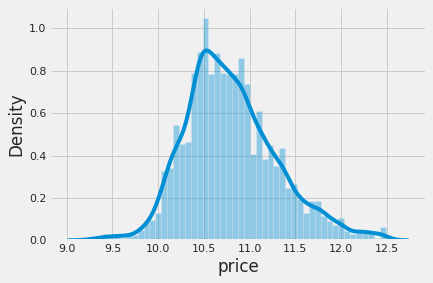

In [24]:
sns.distplot(df['price'])
plt.show()

((array([-3.73364165, -3.50412398, -3.37790896, ...,  3.37790896,
          3.50412398,  3.73364165]),
  array([ 9.25913054,  9.25913054,  9.25913054, ..., 12.46843691,
         12.46843691, 12.48748133])),
 (0.4975754381538926, 10.79661834205313, 0.9897940839780488))

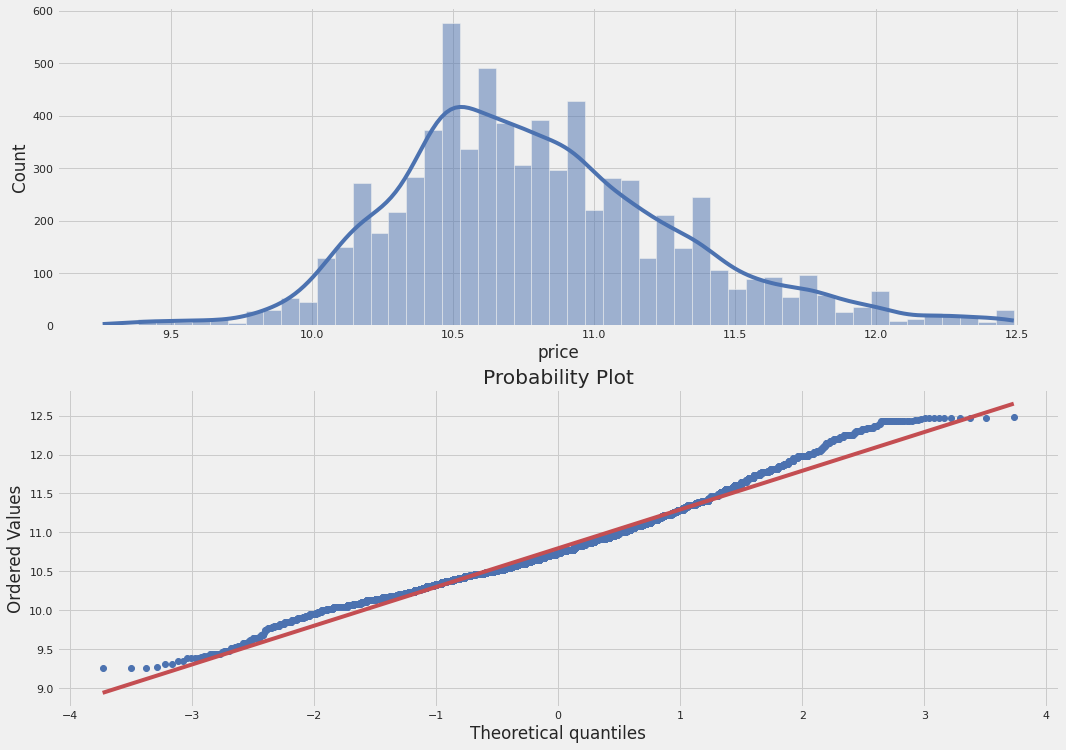

In [25]:
fig = plt.figure(figsize=(16, 12))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

# Histogram
ax1 = fig.add_subplot(grid[0, :])
sns.histplot(df['price'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[1, :])
stats.probplot(df['price'], plot=ax2)

Text(0.5, 0, 'index')

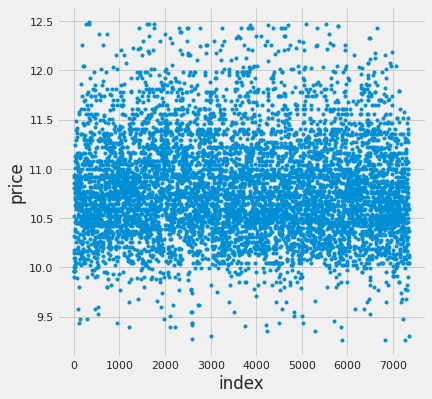

In [26]:
y = np.array(df.price)
plt.figure(figsize=(20, 6))
plt.subplot(131)
plt.plot(range(len(y)), y, '.')
plt.ylabel('price')
plt.xlabel('index')

In [27]:
df.shape

(7345, 9)


### Date
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/date.png?raw=true" width="100"/>

In [28]:
df.df = pd.to_datetime(df.size)

<AxesSubplot:xlabel='size', ylabel='price'>

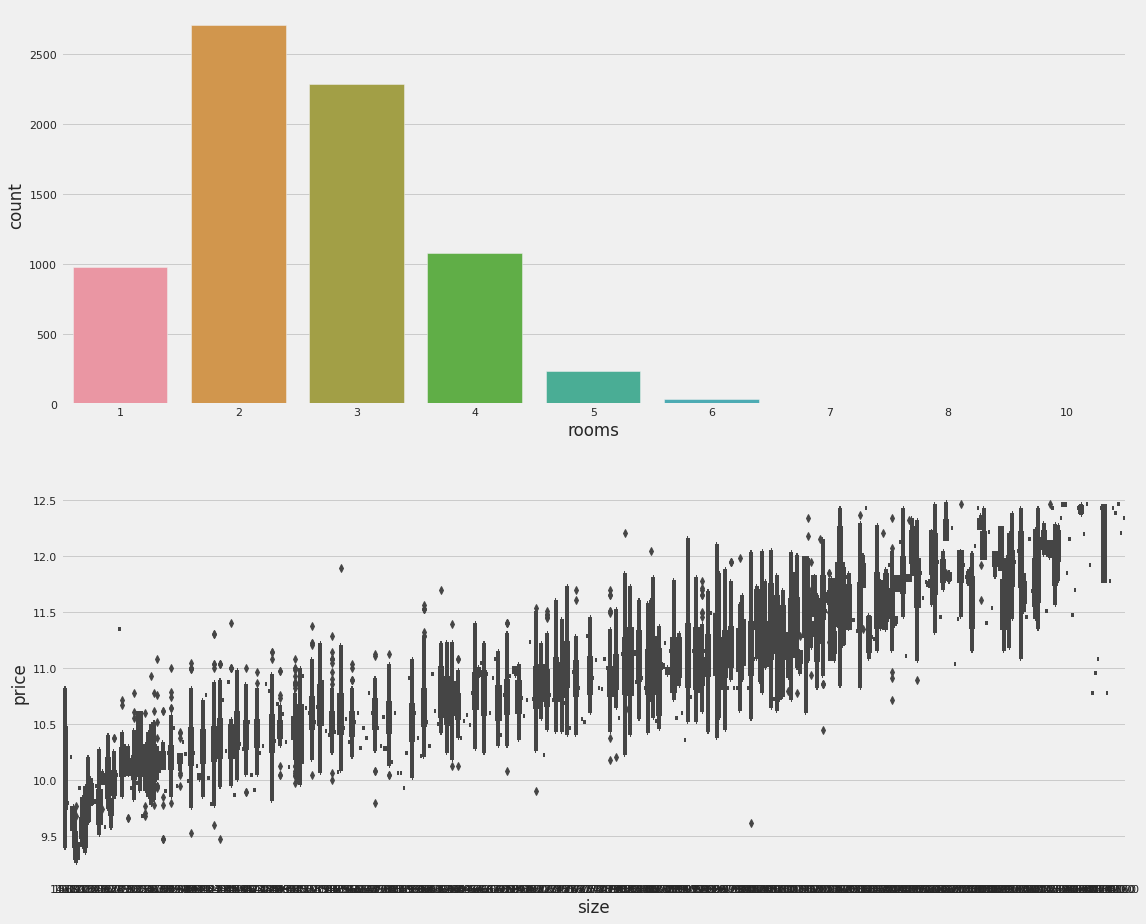

In [29]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
sns.countplot(x=df.rooms, ax=ax1)

ax2 = fig.add_subplot(grid[1, :])
sns.boxplot(x='size', y='price', data=df, ax=ax2)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price', ylabel='count'>

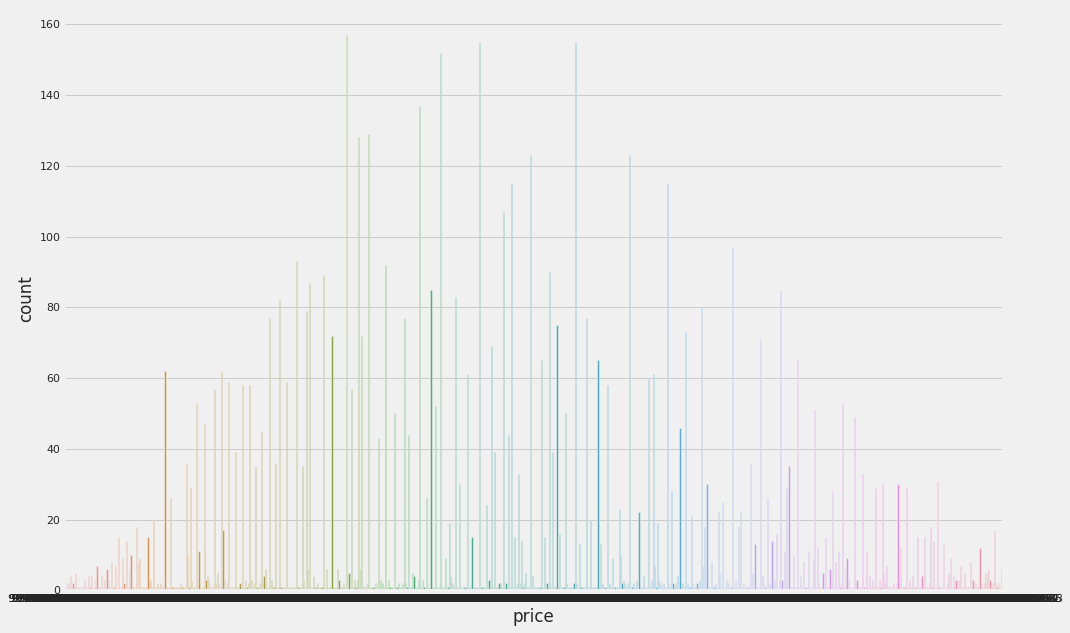

In [30]:
fig = plt.figure(figsize=(15, 10))
sns.countplot(df.price)

#### Date-column have to be deleted

In [31]:
#df.drop('size', axis=1, inplace=True)

#### Checking:

In [32]:
df.head(3)

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,4,4,10.858999,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,4,5,10.933107,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,4,4,10.518673,41.280784,69.223683


### Bedrooms
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/bedroom.png?raw=true" width="100"/>

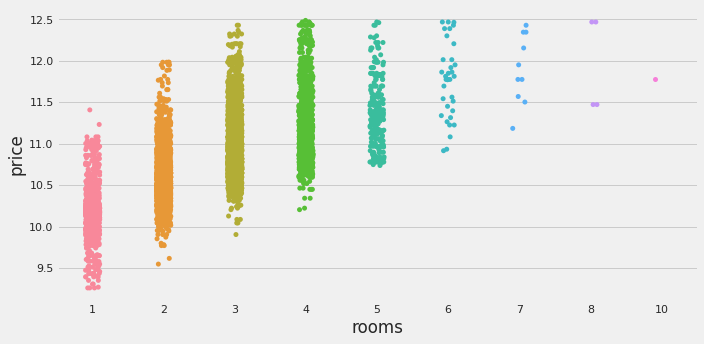

In [33]:
sns.catplot(x='rooms', y='price', data=df, height=5, aspect=2)

<AxesSubplot:xlabel='rooms', ylabel='Count'>

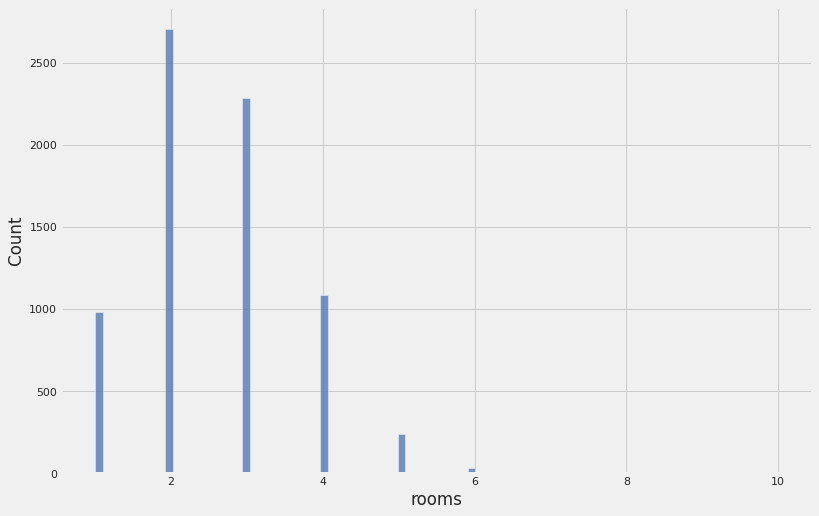

In [34]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(df.rooms)

#### We can see outliers, when the value >= 7. Let's delete this one

In [35]:
df_no_out = df[df.rooms < 7]

Text(0, 0.5, 'Amount')

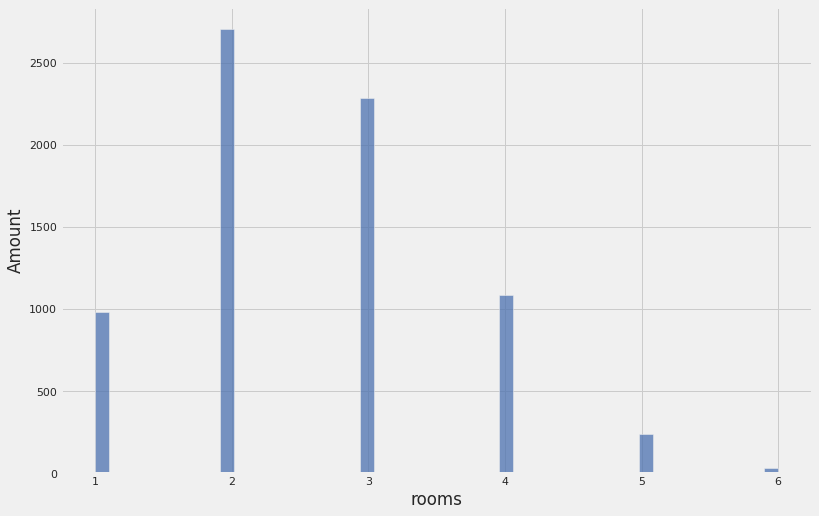

In [36]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(x=df_no_out.rooms)
plt.ylabel('Amount')

In [37]:
df_no_out.shape

(7330, 9)

### Square footage
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/floor-plan.png?raw=true" width="100"/>

In [38]:
sqft_cols = df_no_out.columns[df_no_out.columns.str.contains('sqft')]
sqft_cols

Index([], dtype='object')

In [39]:
def show_count_plots(df_no_out, cols):
    fig = plt.figure(figsize=(10, 10))
    grid = GridSpec(ncols=2,
                    nrows=2, figure=fig)
    for i, name in enumerate(cols):
        ax = fig.add_subplot(grid[i])
        sns.histplot(df_no_out[name], kde=True, ax=ax)

In [40]:
show_count_plots(df_no_out, sqft_cols)

<Figure size 720x720 with 0 Axes>

### Level
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/floors.png?raw=true" width="100"/>

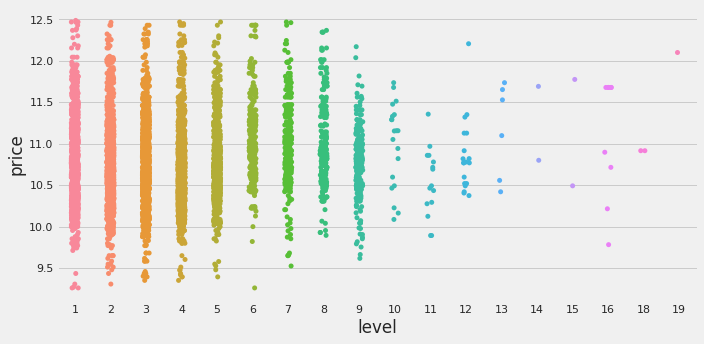

In [41]:
sns.catplot(x='level', y='price', data=df_no_out, height=5, aspect=2)

In [42]:
mask_level = {1: 1, 1.5:1, 2:2, 2.5:3, 3:3, 3.5:3}
df_no_out.level = df_no_out.level.map(mask_level)

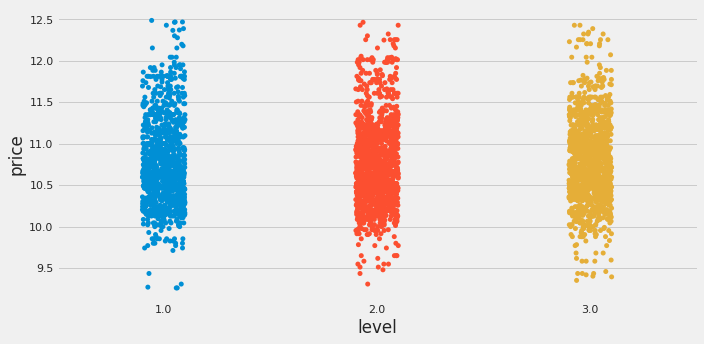

In [43]:
# Excellent !
sns.catplot(x='level', y='price', data=df_no_out, height=5, aspect=2)

#### Let's check the attributes again

In [44]:
df_no_out.head(3)

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,NaN,4,10.858999,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,NaN,5,10.933107,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,NaN,4,10.518673,41.280784,69.223683


### Maximum levels
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/condition.png?raw=true" width="100"/>

4     2846
9     1799
5     1601
8      265
7      206
12     133
3      127
6      104
2       79
10      58
16      52
11      15
1       14
13       8
18       5
17       5
23       4
25       4
19       2
22       1
14       1
20       1
Name: max_levels, dtype: int64


<AxesSubplot:xlabel='max_levels', ylabel='price'>

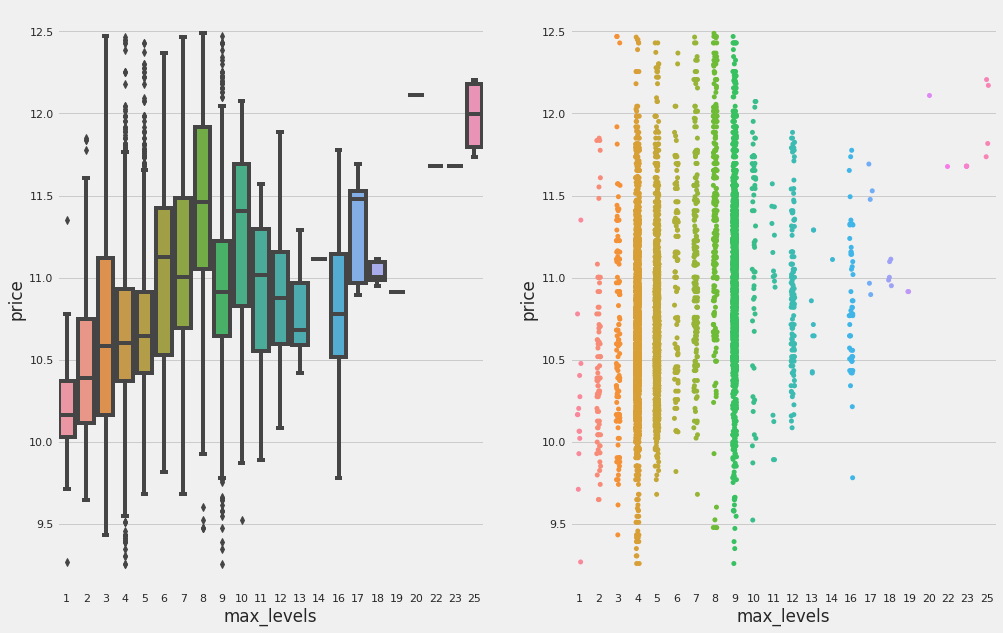

In [45]:
print(df_no_out.max_levels.value_counts())

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(121)
sns.boxplot(x='max_levels', y='price', data=df_no_out, ax=ax1)

ax2 = fig.add_subplot(122)
sns.stripplot(x='max_levels', y='price', data=df_no_out, ax=ax2)

#### Delete column with value = 1

In [46]:
mask_level = df_no_out.max_levels > 1
df_no_out = df_no_out[mask_level]

<AxesSubplot:xlabel='max_levels', ylabel='price'>

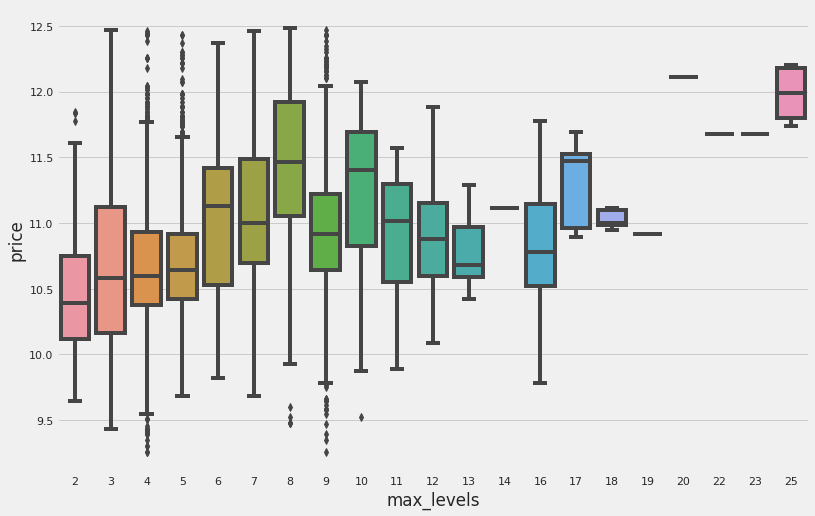

In [47]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(x='max_levels', y='price', data=df_no_out)

#### Checking the data

In [48]:
df_no_out.head(3)

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,NaN,4,10.858999,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,NaN,5,10.933107,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,NaN,4,10.518673,41.280784,69.223683


### Location information
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/location.png?raw=true" width="100"/>

#### Street

In [49]:
df_no_out.address.value_counts()

город Ташкент, Chilonzor район, Чиланзар               112
город Ташкент, Yakkasaroy район, Кушбеги               109
город Ташкент, Mirzo Ulugbek район, Буюк Ипак Йули      85
город Ташкент, Yakkasaroy район, Бабура                 82
город Ташкент, Uchtepa район, Чиланзар 24-й квартал     79
                                                      ... 
город Ташкент, Mirzo Ulugbek район, Дархан-3             1
город Ташкент, Shayhontohur район, Салом алейкум         1
город Ташкент, Uchtepa район, Фозилтепа улица            1
город Ташкент, Mirzo Ulugbek район, Улица феруза         1
город Ташкент, Yashnobod район, Базар Кадышева           1
Name: address, Length: 1532, dtype: int64

In [50]:
data=df_no_out.copy()

#### This will prevent finding the common pattern

In [51]:
data.drop('address', axis=1, inplace=True)

### Checking the dataset
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/checking.png?raw=true" width="100"/>

In [52]:
print(data.shape)
data.head(3)

(7316, 8)


,district,rooms,size,level,max_levels,price,lat,lng
0,Yunusobod,3,57.0,NaN,4,10.858999,41.371471,69.281049
1,Yakkasaroy,2,52.0,NaN,5,10.933107,41.291115,69.261104
2,Chilonzor,2,42.0,NaN,4,10.518673,41.280784,69.223683


# Prepare data for training
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/prepare.png?raw=true" width="100"/>

In [53]:
X = data.drop('price', axis=1)
y = data.price.astype(int)

### Scaler

In [54]:
# set up preprocessing numeric columns
imp_median = SimpleImputer(strategy='median', add_indicator=True)
scaler = StandardScaler()

In [55]:
# set up preprocessing categorical columns
imp_constant = SimpleImputer(strategy='constant')
ohe = OneHotEncoder(handle_unknown='ignore')

In [56]:
# select columns by datatype
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_exclude='number')

In [57]:
# do all preprocessing
preprocessor = make_column_transformer(
    (make_pipeline(imp_median, scaler), num_cols),
    (make_pipeline(imp_constant, ohe), cat_cols)
)

# Model training and visualising
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/external-training-lineal-.png?raw=true" width="100"/>

In [58]:
# create a pipeline
def pipeline_model(X, y, data):
    pipe = make_pipeline(preprocessor, LinearRegression())

    print(cross_val_score(pipe, X, y).mean())

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=32)

    pipe.fit(X_train, y_train)

    predict = pipe.predict(X_test)
    print(f'MSE             : {metrics.mean_squared_error(y_test, predict)}\n'
          f'\nRMSE            : '
          f'{np.sqrt(metrics.mean_squared_error(y_test, predict))}\n'
          f'MAE             : {metrics.mean_absolute_error(y_test, predict)}\n'
          #f'Mean abs % error: '
          #f'{metrics.mean_absolute_percentage_error(y_test, predict)}\n'
          f'\n'
          f'Score (train)   : {pipe.score(X_train, y_train)}\n'
          f'Score (test)    : {pipe.score(X_test, y_test)}\n')
    comparison_of_results(X_test, y_test, pipe)
    visualize_model_results(data, pipe)

def comparison_of_results(X_test, y_test, model, times=5):
    for i in range(times):
        rnd = np.random.randint(0, y_test.shape[0] - 1)
        real = y_test.iloc[rnd]
        pred = int(model.predict(X_test.iloc[rnd].to_frame().T)[0])
        print(f'Real Value      ----->>>>> {real} $\n'
              f'Predicted Value ----->>>>> {pred} $')
        print()


def visualize_model_results(data, model):
    fig = plt.figure(figsize=(17, 10))
    data = data.sort_values(by=['price'])
    X = data.drop('price', axis=1)
    y = data.price.astype(int)
    
    plt.scatter(range(X.shape[0]), y, color='red', label='Real')
    plt.scatter(range(X.shape[0]), model.predict(X), marker='.', label='Predict')

    plt.legend(loc=2, prop={'size': 25})

0.5187440792306709
MSE             : 0.1491317194348825

RMSE            : 0.386175762360719
MAE             : 0.29604956889363576

Score (train)   : 0.5285389331586761
Score (test)    : 0.5236568217731259

Real Value      ----->>>>> 10 $
Predicted Value ----->>>>> 10 $

Real Value      ----->>>>> 10 $
Predicted Value ----->>>>> 9 $

Real Value      ----->>>>> 10 $
Predicted Value ----->>>>> 10 $

Real Value      ----->>>>> 11 $
Predicted Value ----->>>>> 10 $

Real Value      ----->>>>> 10 $
Predicted Value ----->>>>> 10 $



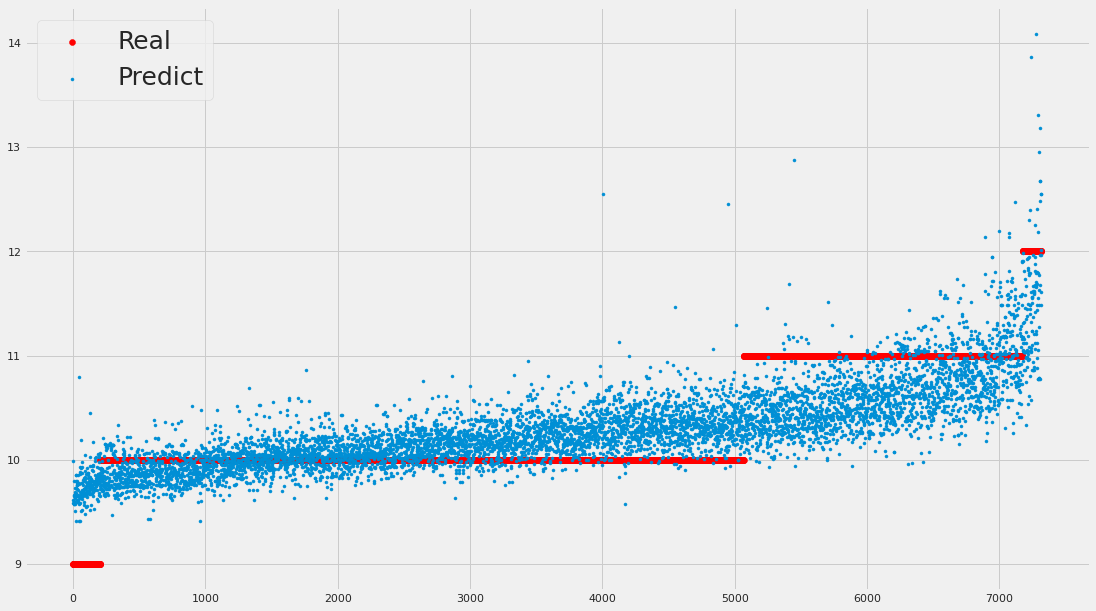

In [59]:
pipeline_model(X, y, data)

Based solely on the metrics provided, it is difficult to make a definitive judgment about whether the model is "bad" or not. The model's performance would depend on the specific context and requirements of the problem being solved.

However, there are some indications from the provided metrics that suggest the model may not be performing very well.